## Student Performance Factors

Dataset from Kaggle -> https://www.kaggle.com/datasets/lainguyn123/student-performance-factors

This dataset provides a comprehensive overview of various factors affecting student performance in exams. It includes information on study habits, attendance, parental involvement, and other aspects influencing academic success.

### Research Questions
Which factors influence student performance the most, and how can we predict a student’s performance based on these factors?

### Metholodgy

#### Data Exploration with Pandas:
* Visualize the data (scatter plots, histograms, heatmaps).
* Investigate the correlation between study time, absences, parental education, and grades.

#### Building a Prediction Model:
* Data Preprocessing: Feature scaling, one-hot encoding of categorical variables.
* Model Training: Use simple models like a neural network (PyTorch) to predict student performance (grades or classes).
* Evaluation: Measure accuracy.

#### Interpret the Results:
* Identify the most important factors influencing performance.
* Derive actionable recommendations (e.g., support programs based on the results or other datasets to enhance the model).

### Imports

In [63]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## Load the Dataset

In [32]:
df = pd.read_csv('StudentPerformanceFactors.csv')  # Provide the correct path to your dataset
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


## Berechnung der Korrelation zwischen 'exam_score' und 'attendance'

In [42]:
correlation = df['Exam_Score'].corr(df['Attendance'])
print(f'Korrelation zwischen exam_score und attendance: {correlation:.2f}')

Korrelation zwischen exam_score und attendance: 0.58


## Visualisierung als Scatterplot (attendance und exam_score)

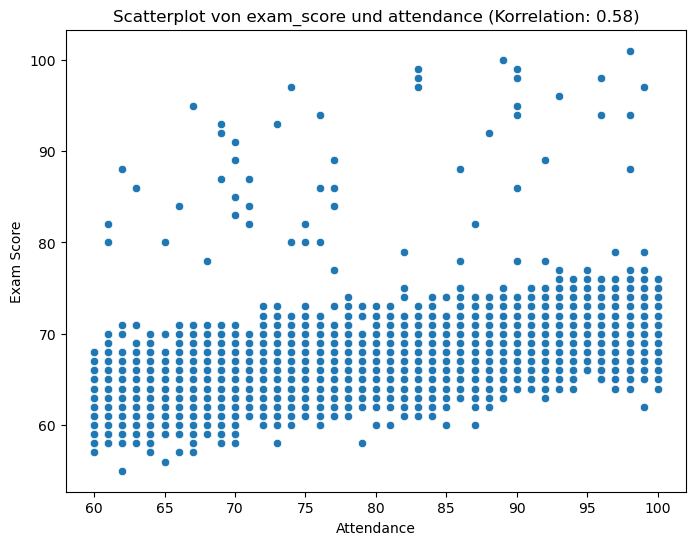

In [44]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Attendance', y='Exam_Score', data=df)
plt.title(f'Scatterplot von exam_score und attendance (Korrelation: {correlation:.2f})')
plt.xlabel('Attendance')
plt.ylabel('Exam Score')
plt.show()

## Berechnung der Korrelation zwischen 'tutoring_sessions' und 'exam_score'

In [51]:
correlation_tutoring = df['Tutoring_Sessions'].corr(df['Exam_Score'])
print(f'Korrelation zwischen tutoring_sessions und exam_score: {correlation_tutoring:.2f}')

Korrelation zwischen tutoring_sessions und exam_score: 0.16


## Visualisierung als Scatterplot (tutoring_sessions und exam_score)

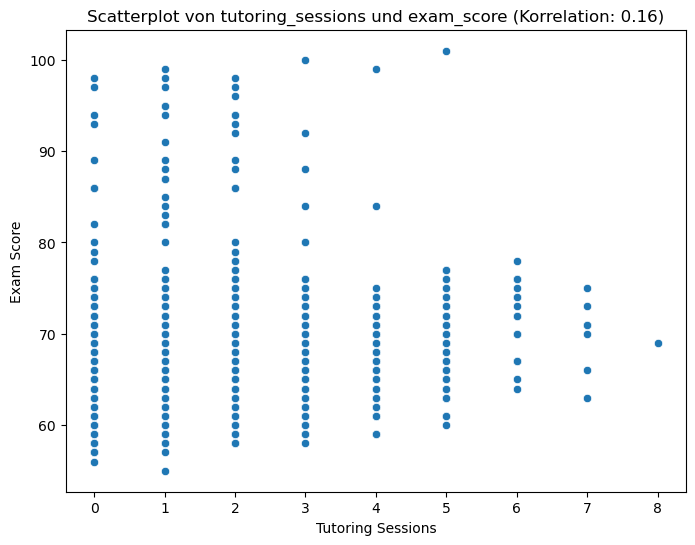

In [55]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Tutoring_Sessions', y='Exam_Score', data=df)
plt.title(f'Scatterplot von tutoring_sessions und exam_score (Korrelation: {correlation_tutoring:.2f})')
plt.xlabel('Tutoring Sessions')
plt.ylabel('Exam Score')
plt.show()

## Korrelation zwischen allen nummerischen Spalten als Heatmap

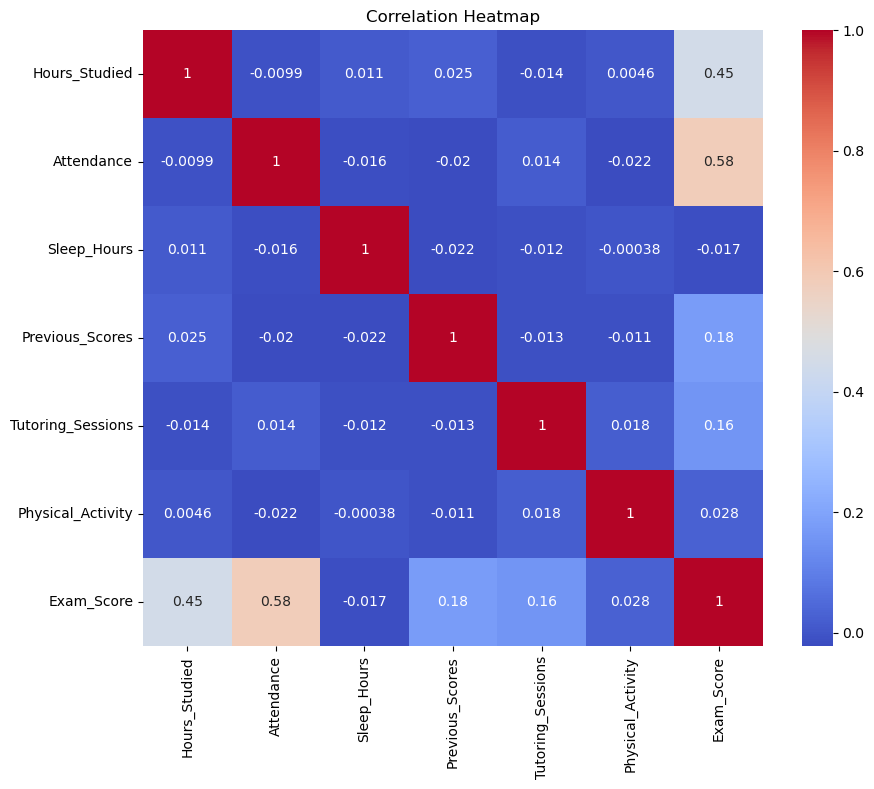

In [65]:
# Nur numerische Spalten auswählen
numeric_df = df.select_dtypes(include=[np.number])

# Korrelation berechnen und als Heatmap visualisieren
plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

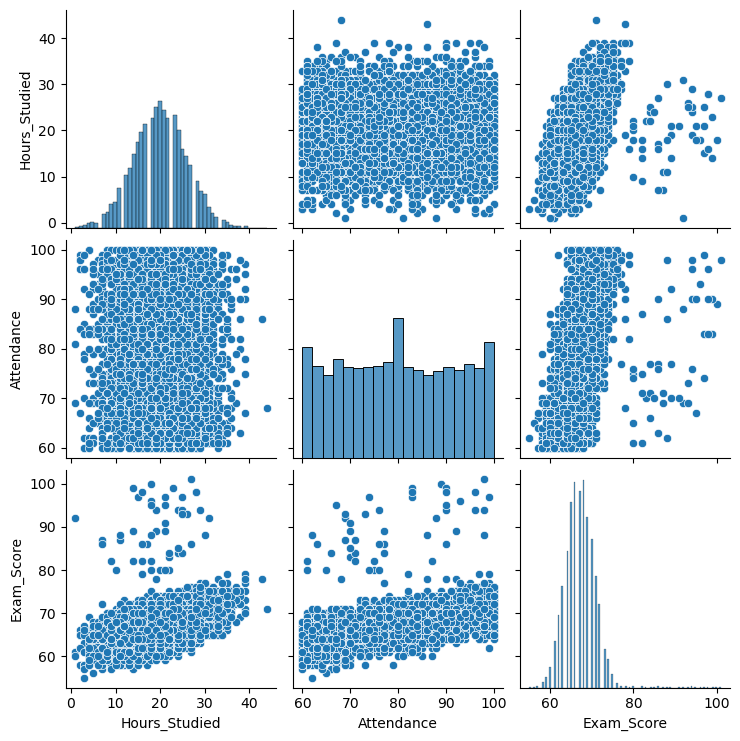

In [74]:
# Visualizing relationships between key variables (e.g., study time and grades)
sns.pairplot(df[['Hours_Studied', 'Attendance', 'Exam_Score']])
plt.show()

### Tipps:
- https://auto.gluon.ai/dev/api/autogluon.tabular.models.html -> wertet automatisch aus, wo die korrelationen genau sind
- kategorische Werte nehmen und dafür Werte vergeben, damit man da auch die Korrelation rausfindet
- kombinatorische korrelationen rausfinden